<h1><center> Introduction to Programming Midterm: </center></h1>
 <h2><center> A Timeseries Model of Steps 1-3 of Glycolysis </center></h2>
 <h3><center> Kenny P. Callahan : 13 October 2019 </center></h3>



<h2><center> Introduction </center></h2>

Glycolysis is the fundamental source of energy metabolism in cells, and produces pyruvate as a direct product. Healthy cells in humans use aerobic respiration for energy production in the form of adenosine triphsophate (ATP). This requires the pyruvate dehydrogenase catalyzed conversion of pyruvate into acyl coenzyme A (Acyl CoA), which then enters the tricarboxylic acid cycle to produce reaction intermediates for the electron transport chain and oxidative phosphorylation. Overall, this process can take one molecule of glucose and produce over 30 molecules of ATP, and hence is extremely efficient for energy production. The net balanced equation for Aerobic respiration is 

$$ C_6H_{12}O_6 + 6O_2 \to 6 H_2O + 6 CO_2 + energy, $$

where energy refers to 38 ATP produced during aerobic respiration. An interesting aspect of cellular transformation to cancerous growth is a heavy dependence on glycolysis and fermentation for ATP production, which produces only two molecules of ATP per molecule of glucose consumed. A balanced equation for glycolysis and fermentation is 

$$ C_6H_{12}O_6 + 6O_2 \to 2 C_2H_5OH + 2 CO_2 + energy, $$

where energy here refers to two ATP molecules per molecule of glucose. Cancer cells are defined by the metabolic switch from aerobic respiration to glycolysis and fermentation, a process called the Warburg Effect, as well as increased replicative potential, evasion of apoptosis (coordinated cell death), increased growth factor signaling, evasion of immune destruction, and increased motility (disengagement from the extracellular matrix and subsequent cellular movement). All of these processes require inordinate amounts of energy, which cancer cells *produce significantly less of*. The question we wish to explore is how cancer cells are able to meet the energetic requiremets of transformation given a less efficient energy production system.

The following program numerically calculates the concentration of dimensionless variables which represent glycolytic reactants for the first two enzyme catalyzed reactions of glycolysis. Differential equations representing the change in Glucose, Glucose-6-Phosphate (G6P) and Fructose-6-Phosphate (F6P) were constructed using a Michaelis Menton model for the enzyme catalyzed reaction velocity. We assume that all of the product from one step of glycolysis become all of the reactants for the next step, and we assume the intital import of glucose ($g_{in}$) and the final export of F6P ($f_{out}$) are constant. Differential equations for the three variables were nondimensionalized in order to observe the raw behavior of the system. Finally, the constructed program prompts the user for input values corresponding to various constant values (often measured experimentally), runs a timeseries, and produces graphical outputs corresponding to nondimensionalized variable values versus time.



<h2><center> Glycolysis and Fermentation: </center></h2>
<h3><center> A Short Cycle to Replenish Reaction Intermediates </center></h3>

As stated prior, glycolysis refers to the import and conversion of glucose into pyruvate through a ten step metabolic pathway, where each step is an enzyme catalyzed reaction. 

![alt text](https://www.ncbi.nlm.nih.gov/books/NBK22593/bin/ch16f3.jpg)

Figure 1: An overview of Glycolysis (Berg, 2002)

At each step, enzymes can either catalyze only a single reaction (in the case of Glucose-6-Phosphate Isomerase conversion of G6P to F6P) or two reactions can be *coupled*, meaning that the enzyme performs two concurrent reactions (as in the case of Hexokinase mediated phosphorylation of glucose coupled with Hexokinase mediated hydrolysis of ATP). Coupled reations serve mainly to aid in energetically unlikely reactions, and often are comprised of an energetically favorable reaction (ATP hydrolysis releases quite a bit of energy) and an energetically unfavorable reaction (Glucose phosphorylation requires quite a bit of energy). The free energy released during the favorable reaction lowers (or fulfills) the required energy input for the unfavorable reaction, allowing the unfavorable reaction to proceeed forward. Reactions can also be coupled to proton donors/recievers (or electron recievers/donors, depending on how you like to think about acid base reactions), during which molecules are protonated/deprotonated while producing the primary product of the reaction. 

Some enzymes in Glycolysis are subject to *allosteric regulation*, where elevated concentrations of specific molecules (often times direct products or products formed later in the pathway) inhibit the function of an enzyme. A beautiful example of this is Hexokinase, which is directly inhibited by both of its products (G6P and ATP), and is activated by high levels of adenosine diphosphate (ADP) and glucose. 

During normal cellular conditions, product inhibition is a large mechanism to control overproduction of pyruvate, as 38 ATP molecules are produced from a single glucose molecule and largely inhibit Hexokinase catalytic activity. Cancer cells, however, produce *lactate* (the product of fermentation in human cells) and export lactate from the cell. This leads to two phenomena; cancer cells will produce only 2 ATP per round of glycolysis and *the product of each reaction will be at a lower concentration than the reactant*, promoting continuation of glycolysis. In healthy cells, reaction products will quickly build up (unless shunted into another pathway) as the amount of ATP increases with each round. These products will inhibit the glycolytic enzymes until the products exist in low concentrations, at which point the reaction equilibrium will favor production of product *and* the enzyme will not be allosterically inhibited. In glycolysis and fermentation, the product of the final step does not accumulate in the cell at high concentrations, since the extracellular fluid will certainly be at a lactate deficit and the concentration gradient will promote facilitated diffusion of lactate from the cell. Consistently low lactate concentrations will make the reaction equilibrium favor production of lactate, utilizing pyruvate. This trend of product deficiency will continue, turning the cancer cell into a "glucose vaccum" whose concentration gradient greatly favors glucose import into the cell. 

![alt text](https://www.researchgate.net/profile/Saman_Abeysekara/publication/236435841/figure/fig2/AS:669450969825289@1536620957763/L-lactic-acid-production-endogenous-in-body-tissues-the-conversion-of-pyruvate-to.png)

Figure 2: Replenishment of Glycolytic Reactants from lactate production.

Production of lactate is key to this cycle; lactate dehydrogenase A (LDHA) catalyzed conversion of pyruvate to lactate consumes two nicotinic adenine dinucleotide reduced (NADH) molecules (produced in glycolysis), and produces NAD oxidized (NAD+, consumed in glycolysis, Figure 2). Two molecules of ATP are produced in phase 3 of glycolysis (Figure 1), and thus all reactants are reproduced with lactate production. 

The following mathematical model attempts to use our empirical and mathematical understanding of enzyme function to observe the behavior of glycolysis numerically.

<h2><center> A Simple Model </center></h2>
<h3><center> Differential Equation Construction </center></h3>
<h4><center> Michaelis-Menten Reaction Velocities </center></h4>
    
In order to construct differential equations that relate the concentrations of each component of glycolysis, we must first as the question of *how fast* the reaction proceeds. Luckily, there is a well established model for the reaction velocity $v$ for single-protein enzymes named after its inventors Leonor Michaelis and Maud Menten. The Michaelis-Menten equation for reaction velocity is

$$ v = V_{max}\ \dfrac{[S]}{K_M+[S]}\ (1),$$

where $V_{max}$ is the maximum reaction velocity, $[S]$ is the concentration of substrate, and $K_M$ is the Michaelis-Menten constant and is numerically equivalent to the concentration of substrate at $\tfrac{1}{2}V_{max}$. This equation functions such that as the concentration of substrate gets absurdly high ($[S]>>K_M$), $v$ will approach the value of $V_{max}$. Crucial to our use of this equation is the fact that these enzymes are single protein enzymes, as protein complexes have been shown to disobey this reaction velocity equation (Berg, 2002). This reaction velocity equation, as it stands, works for single enzymes that experience no product inhibition. 

A Michaelis-Menten reaction velocity equation can take into account free enzyme inhibition by a molecule ($E+I\to EI$), or enzyme-substrate complex inhibition by a molecule ($ES + I \to ESI$). If the inhibition occurs with free enzyme, we can image that the maximal rate of the reaction will be reduced, and hence the concentration of inhibitor will influence the concentration of substrate at $\tfrac{1}{2}V_{max}$, or $K_M$. The $K_M$ is lowered at low inhibitor concentrations, and it is elevated at high inibitor concentrations. This can be modeled in a similar manor to logistic growth, where we have a term in the form $(1 + \tfrac{[I]}{Keq})$ that increases the $K_M$ when $[I]>>Keq$, and reduces the $K_M$ when $[I]<<[Keq]$. If the inhibition occurs on the enzyme-substrate complex, then a smaller amount of substrate will saturate the enzyme at a higher rate, and the effective concentration of substrate for saturation will be increased. We can model this similarly to the $K_M$, where we multiply the concentration of substrate in the denominator by $(1 + \tfrac{[I]}{Keq})$. Hence, more inhibitor makes a smaller amount of substrate have a greater saturation effect (For a full derivation of this equation, visit http://www1.lsbu.ac.uk/water/enztech/inhibition.html). The result reaction velocity equation is 

$$ v_{Inhibition} = V_{max}\ \dfrac{[S]}{K_M(1 + \tfrac{[I]}{K_I})+[S](1 + \tfrac{[I]}{K_I})} \ (2),$$

where $K_I$ is the equilibrium constant for inhibition of the enzyme by the inhibitor. A for nondimensionalization later, it is important to express $v_{Inhibition}$ in an alternate form. If we distribute $K_M$ and $[S]$ in the denominator of $v_{Inhibition}$ and add $\tfrac{K_M [I]}{K_I}$ and $\tfrac{[S] [I]}{K_I}$, we can then multiply $v_{Inhibition}$ by $\tfrac{K_I}{K_I}$, which results in 

$$ v_{Inhibition} = V_{max}\ \dfrac{[S]K_I}{K_M \ K_I + [S] \ K_I + [I] K_M + [I][S]} \ (3).$$

From (3), we can group terms containing $K_I$ and $[I]$, factor them out, leaving $(K_M + S)$ in both terms, and a final factorization gives

$$ v_{Inhibition} = V_{max}\ \dfrac{[S]K_I}{(K_I + [I])(K_M + [S])}. \ (4),$$

which is the form desired for nondimensionalization. 

With these two reaction velocity equations, we can model the first two enzyme catalyzed reactions of glycolysis. Here, we choose to examine the concentration of reactants/products as a function of time. 

<h4><center> Major Reacant/Product Differential Equations </center></h4>

With relations for the reaction velocities of Hexokinase ($v_{Inhibition}$) and G6P isomerase ($v$), we can begin to construct a three variable model of the first two enzyme catalyzed reactions of glycolysis. We assume that glucose import ($g_{in}$) and F6P Export ($f_{out}$) are constant, and that the prodcut of each reaction is used solely for the preceedig reaction. 

To best understand how each variable changes, we will examine the reaction catalyzed by each enzyme (NOTE: although enzymes can have coupled reaction, each individual reaction occurs independent of one another, and hence we choose to only examine the major reactants of the glycolytic system),

$$ Glucose \to r_1 \to G6P \ \ (Rxn_1),$$
$$ G6P \to r_2 \to F6P \ \ (Rxn_2)$$

where $r_1$ and $r_2$ are the reaction rates for glucose phosphorylation (catalyzed by Hexokinase) and G6P isomerization (catalyzed by G6P isomerase), respectively. Examining the first equation, we see that the loss of glucose is equal to the reaction rate $r_1$ times the concentration of glucose, as that portion of the population will be lost per unit time. We see also that the production of G6P is exactly the amount of glucose lost, as one molecule of glucose produces one molecule of G6P. Looking at equation two, we see that the amount of G6P lost is equal to $r_2$ times the concentration of G6P. The production of F6P is, in turn, exactly how much G6P is lost in the second reaction. 

Let $g$ be the concentration of glucose, $p$ be the concentration of G6P, $f$ be the concentration of F6P, $K_g$ be the $K_M$ of hexokinase catalyzed glucose phosphorylation, $K_p$ be the $K_M$ of G6P isomerase mediated G6P isomerization, $V_g$ be the $V_{max}$ of hexokinase catalyzed glucose phosphorylation, $V_p$ be the $V_{max}$ of G6P isomerase mediated G6P isomerization, $K_{Ip}$ be the G6P-Hexokinase inhibition equilibrium constant, and $t$ be time. With the variables and intuition defined above, we can construct the following relations:

$$ v_g = V_{g}\ \dfrac{g \cdot K_{Ip}}{(K_{Ip} + p)(K_g + g)} \ \ \ (5), $$

$$ v_p = V_p \dfrac{p}{K_p + p} \ \ \ (6), $$

$$ \dfrac{dg}{dt} = g_{in} - v_g \ g = g_{in} - V_{g}\ \dfrac{g \cdot K_{Ip}}{(K_{Ip} + p)(K_g + g)} \ g \ \ \ (7),$$

$$\dfrac{dp}{dt} = v_g \ g - v_p \ p = V_{g}\ \dfrac{g \cdot K_{Ip}}{(K_{Ip} + p)(K_g + g)} \ g - V_p \dfrac{p}{K_p + p} \ p \ \ \ (8),$$

$$\dfrac{df}{dt} = v_p - f_{out} = V_p \dfrac{p}{K_p + p} \ p - f_{out} \ \ \ (9).$$


<h3><center> Nondimensional Analysis </center></h3>

In order to simulate the model using a computer, it is best that we change how we are expressing our values. Values in chemistry, like the mole, represent huge numbers, and expressing an amount in moles can require large decimals that some computers wouldn't enjoy handling. To combat this, we can *nondimensionalize* the equations, a process by which we assert that a variable is equal to a coefficient (with the same units as the variable) multiplied by a dimensionless variable. If $a$ is the variable, $\gamma$ is the coefficient, and $A$ is the dimensionless variable, we have that $a = \gamma A$, or $A = \tfrac{a}{\gamma}$. Using a relationship like this, we are able to transform our equations into ones without dimension, in terms of dimensionless variables. We can set these variables such that they operate with numbers of reasonable size (that the computers won't be angry about), and all of the original information required to find the actual values with dimension is encoded in our definitions. 

Applying this process to our differential equations, we define $g = \delta G$, $p = \rho P$, $f = \kappa F$, and $t = \tau i$. Substituting theses into the glucose differential equation, we have (with some slight rearrangement)

$$ \dfrac{\delta}{\tau} \dfrac{dG}{di} = g_{in} - V_{g}\ \dfrac{\delta^2 \cdot G^2 \cdot K_{Ip}}{(K_{Ip} + \rho \cdot P)(K_g + \delta \cdot G)}.$$ 

After substitution, the next step of nondimensionalization is to divide by the coefficient on the term of the highest order, which in this case is $\tfrac{dG}{di}$, which leaves

$$ \dfrac{dG}{di} = \dfrac{\tau \cdot g_{in}}{\delta} - \dfrac{K_{Ip} \cdot \delta \cdot V_g \cdot \tau}{(K_g + \delta \cdot G)(Ki + \rho \cdot P)} \ G^2.$$

If we choose to define $\delta = K_g$, $\rho = K_{Ip}$, and $\tau = \tfrac{1}{V_g}$, almost all of the original constants disappear, and we are left with 

$$\dfrac{dG}{di} = \lambda_1 - \dfrac{G^2}{(1+G)(1+P)} \ \ \ (11),$$

where $\lambda_1 = \tfrac{g_{in}}{K_g \cdot V_g}$, which is dimensionless. Applying this process to $\tfrac{dp}{dt}$ and $\tfrac{df}{dt}$, respectively, we define $\kappa = K_{Ip}$, $\lambda_2 = \tfrac{K_g}{K_p}$, $\lambda_3 = \tfrac{V_p}{V_g}$, $\lambda_4 = \tfrac{K_p}{K_{Ip}}$, and $\lambda_5 = \tfrac{f_{out}}{K_{Ip} \cdot V_g}$, we have the nondimensional equations

$$ \dfrac{dP}{di} = \lambda_2  \dfrac{G^2}{(1+G)(1+P)} - \lambda_3 \dfrac{P^2}{\lambda_4 + P} \ \ \ (12),$$

$$\dfrac{dF}{di} = \lambda_3 \dfrac{P^2}{\lambda_4 + P} - \lambda_5 \ \ \ (13).$$

With our nondimensional differential equations, we can begin to write the program. For reference, we provide a table of dimensional variables, coefficients, and relationships, as well as a nondimensional version. 

<h6><center> Dimensional Variables, Coefficients, and Relationships </center></h6>

|\ Variables \ \  | \ \ \ \Coefficients \ \ \ \ \ \ \ \ \ |\ \ \ \ \ Relationships \ \ \ \ \ \ \ \ \ \ \ \ \ \  |
|-----------------|---------------------------------------|-----------------------------------------------------|
| $g = [Glu]$     |$K_g = K_M$ glucose to G6P             | $v_p = V_p\tfrac{p}{K_p+p}$                         |
| $p = [G6P]$     |$V_g = V_{max}$ glucose to G6P         | $v_g = V_g\tfrac{K_{Ip}g}{(K_g+g)(K_{Ip}+p)} $      |
| $f = [F6P]$     |$K_p = K_M$ G6P to F6P                 | $\tfrac{dg}{dt} = g_{in} - v_g \cdot g$             |
| $t = time$      |$V_p = V_{max}$ G6P to F6P             | $\tfrac{dp}{dt} = v_g \cdot g - v_p \cdot p$        |
|.               .|$K_{Ip} = K_{eq}$ inhibition           | $\tfrac{df}{dt} = v_p \cdot p - f_{out}$            |
|.               .|$g_{in} =$ glucose import              |.                                                   .|
|.               .|$f_{out} =$ F6P export                 |.                                                   .| 
|.               .|.                                     .|.                                                   .|

<h6><center> Dimensionless Variables, Coefficients, and Relationships </center></h6>

|\  Variables \ \ \ \ \  | \ \ \  \ Coefficients  \ \ \ \ \ \ \ \ \ \  | \ \ \     Relationships \ \ \ \ \ \ \ \ \ \ |
|-----------------------|-------------------------------------|-----------------------------------------------------|
|$G = \tfrac{g}{\delta}$|$\lambda_1= \tfrac{g_{in}}{K_g \cdot V_g}$   |$G'= \lambda_1 - \dfrac{G^2}{(1+G)(1+P)}$    |
| $P = \tfrac{p}{\rho}$ |$\lambda_2= \tfrac{K_g}{K_p}$                |$P'=\lambda_2\dfrac{G^2}{(1+G)(1+P)}-    $   |
|.                     .|.                                           .|$\lambda_3 \dfrac{P^2}{\lambda_4 + P}$       |
| $F=\tfrac{f}{\kappa}$ |$\lambda_3=  \tfrac{V_p}{V_g}$               |$F'=\lambda_3\dfrac{P^2}{\lambda_4+P}$       |
|.                     .|.                                           .|$   -\lambda_5   $                          .|
| $i = \tfrac{t}{\tau}$ |$\lambda_4= \tfrac{K_p}{K_{Ip}}$             |.                                           .|
| $\delta = K_g$        |$\lambda_5=\tfrac{f_{out}}{K_{Ip}\cdot V_g}$ |.                                           .|
| $\rho = K_{Ip}$       |.                                           .|.                                           .|
| $\kappa = $K_{Ip}     |.                                           .|.                                           .| 
|$\tau = \tfrac{1}{V_g}$|.                                           .|.                                           .|


Now, for the construction of the program...

In [1]:
# https://www.researchgate.net/publication/236435841_D-Lactic_Acid_Metabolism_and_Control_of_Acidosis 
#Figure 2 source

<h2><center> A Timeseries Program </center></h2>
<h3><center> A Brief Aside </center></h3>

Originally, this timeseries program ran in SageMath 8.8, which has many built in graphing functions, and was meant only for me. Since taking the Intro to Programming (With Python) course, I realized that I could make this a little bit more user friendly, and make the code look... better... (I promise you, Jim, if you had read my code from last semester you would have cried, it was awful). For this midterm, I decided to turn this program into a python-only program. As it turns out, SageMath 8.8 does some very nice things that Python3 just doesn't. However, I do have a functioning version of the program that spits out graphs!


<h3><center> Program Documentation </center></h3>

The documentation for this program is a really, really brief version of all the stuff described above, as well as a small description of what inputs are available. If the user has access to the program and can edit it, they can change certain parts of the main function to input either real, measured values or the values of the dimensionless coefficients themselves (without a way to convert back to dimensional units). How the program is set at the moment, we will input dimensional values that will be transformed into dimensionless values and run through a timeseries. 

The remainder of the documentation goes over the maths/what the program does. We see the description of input variables, input coefficients, dimensional equations, dimensionless variable/coefficient definitions, and dimensionless differential equations. This is to inform the user of what the parts of the program are called. 

For some reason, the notebook just tries (and fails) to print the documentation when I run the cell.

In [2]:
'''
Kenny P. Callahan
8 October 2019


This program takes inputs of initial concentrations of glycolytic
reactants/products, and numerically models the concentration of reactants 
over time. 

You can turn on or off different input values. For example, if you 
want to see how different values of lambda1-lambda5 change the model, 
you can comment out the input for the Km and Vmax values. If you do so,
you will have to alter how the main program runs, so it doesn't try
to convert the dimensionless values back to dimension-containing 
values (since we haven't defined any of the conversions needed to 
go back and forth).

The areas that can be commented out are labeled as such, and they have 
description comments as well.

Regardless, the user is required to input the concentration of reactants/
products, as well as the size of the time step and the number of steps. 


=====================================================================================

Variable Definitions:

glu = initial concentration of glucose
g6p = initial concentration of G6P
f6p = initial concentration of fructose-6-phosphate (F6P)
time_step = size of the time step that we will use to numerically approximate the 
            reactant concentrations over time
steps = number of steps that the model will run through

=====================================================================================

Constant definitions:

kg = Michaelis Menten constant (Km) for hexokinase catalyzed glucose phosphorylation
vg = Maximum reaction velocity (Vmax) for hexokinase catalyzed glucose phosphorylation
kp = Km of glucose-6-phosphate (G6P) isomerase catalyzed G6P isomerization
vp = Vmax of glucose-6-phosphate (G6P) isomerase catalyzed G6P isomerization
ki = Equilibrium constant (Keq) for inhibition of hexokinase by G6P

=====================================================================================

Dimensional Equations:

V1 = (vg * ki * g)/((kg + g)(ki + p))

V2 = (vp * p)/(kp + p)

d(glu)/dt = gin - V1 * glu

d(g6p)/dt = V1 * glu - V2 * g6p

d(g6p)/dt = V2 - fout

=====================================================================================

Dimensionless Definitions:

glu = delta * G
g6p = rho * P
f6p = kappa * F
t = tao * i

delta = kg
rho = ki
kappa = ki
tao = 1/vg

lambda1 = gin/(kg*vg)
lambda2 = kg/ki
lambda3 = vp/vg
lambda4 = kp/ki
lambda5 = fout/(ki*vg)

=====================================================================================

Dimensionless Equations:

dG/di = lambda1 - G**(2)/((1+G)+(1+P))

dP/di = (lambda2 * G**(2)/((1+G)+(1+P))) - (lambda3 * (P**(2)/(lambda4 + P)))

dF/di = (lambda3 * (P**(2)/(lambda4 + P))) - lambda5

=====================================================================================

'''

"\nKenny P. Callahan\n8 October 2019\n\n\nThis program takes inputs of initial concentrations of glycolytic\nreactants/products, and numerically models the concentration of reactants \nover time. \n\nYou can turn on or off different input values. For example, if you \nwant to see how different values of lambda1-lambda5 change the model, \nyou can comment out the input for the Km and Vmax values. If you do so,\nyou will have to alter how the main program runs, so it doesn't try\nto convert the dimensionless values back to dimension-containing \nvalues (since we haven't defined any of the conversions needed to \ngo back and forth).\n\nThe areas that can be commented out are labeled as such, and they have \ndescription comments as well.\n\nRegardless, the user is required to input the concentration of reactants/\nproducts, as well as the size of the time step and the number of steps. \n\n\n=====================================================================================\n\nVariable De

<h3><center> Imports for Graphing </center></h3>

This cell simply imports standard graphing tools.

In [3]:
#############################################################################
#
#
#Graphing imports

#%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np



#
#
#############################################################################

<h3><center> Functions </center></h3>

For each function in this block, I will display the code itself and describe the fuction.

<h6> Function 1: introduction() </h6>

The goal of the introduction() function is to prompt the user to read the documentation. This program is a little bit complicated, and seeing what things mean and what the mathematical basis of the model is before begining may be helpful.

```python
words = ["Hello, this program is a little complicated, and it is highly\n\
        recommended that you read a little about the program", 
        "If you would like to read about the program, type __doc__ now: ",
        "The program will prompt you to enter the intial concentrations of\n\
        some of the reactants in glycolysis. If you submit an invalid attempt, \n\
        you will be reprompted at the end of entering intial values."]


def introduction(n0 = 0,n1 = 1,n2 = 2):
    '''
    Kenny P. Callahan
    8 October 2019


    This program takes inputs of initial concentrations of glycolytic
    reactants/products, and numerically models the concentration of reactants 
    over time. 

    You can turn on or off different input values. For example, if you 
    want to see how different values of lambda1-lambda5 change the model, 
    you can comment out the input for the Km and Vmax values. If you do so,
    you will have to alter how the main program runs, so it doesn't try
    to convert the dimensionless values back to dimension-containing 
    values (since we haven't defined any of the conversions needed to 
    go back and forth).

    The areas that can be commented out are labeled as such, and they have 
    description comments as well.

    Regardless, the user is required to input the concentration of reactants/
    products, as well as the size of the time step and the number of steps. 


    =====================================================================================

    Variable Definitions:

    glu = initial concentration of glucose
    g6p = initial concentration of G6P
    f6p = initial concentration of fructose-6-phosphate (F6P)
    time_step = size of the time step that we will use to numerically approximate the 
                reactant concentrations over time
    steps = number of steps that the model will run through

    =====================================================================================

    Constant definitions:

    kg = Michaelis Menten constant (Km) for hexokinase catalyzed glucose phosphorylation
    vg = Maximum reaction velocity (Vmax) for hexokinase catalyzed glucose phosphorylation
    kp = Km of glucose-6-phosphate (G6P) isomerase catalyzed G6P isomerization
    vp = Vmax of glucose-6-phosphate (G6P) isomerase catalyzed G6P isomerization
    ki = Equilibrium constant (Keq) for inhibition of hexokinase by G6P

    =====================================================================================

    Dimensional Equations:

    V1 = (vg * ki * g)/((kg + g)(ki + p))

    V2 = (vp * p)/(kp + p)

    d(glu)/dt = gin - V1 * glu

    d(g6p)/dt = V1 * glu - V2 * g6p

    d(g6p)/dt = V2 - fout

    =====================================================================================

    Dimensionless Definitions:

    glu = delta * G
    g6p = rho * P
    f6p = kappa * F
    t = tao * i

    delta = kg
    rho = ki
    kappa = ki
    tao = 1/vg

    lambda1 = gin/(kg*vg)
    lambda2 = kg/ki
    lambda3 = vp/vg
    lambda4 = kp/ki
    lambda5 = fout/(ki*vg)

    =====================================================================================

    Dimensionless Equations:

    dG/di = lambda1 - G**(2)/((1+G)+(1+P))

    dP/di = (lambda2 * G**(2)/((1+G)+(1+P))) - (lambda3 * (P**(2)/(lambda4 + P)))

    dF/di = (lambda3 * (P**(2)/(lambda4 + P))) - lambda5

    =====================================================================================

    '''
    print(words[n0])
    print("")
    print("")
    doc = input(words[n1])
    if doc == "__doc__":
        print(introduction.__doc__)
    else:
        pass
    print("")
    print("")
    print(words[n2])
    
```

This function starts with a list of "words", which contains the three phrases that introduction() calls. The function introduction(n1, n2, n3) has three arguments that are preset to "0", "1", and "2", corresponding to the indices of the list "words". Upon running, the program will suggest that the user read the documentation, then prompt the user to input "__doc__" to read the documentation. If the user inputs "__doc__", the program will print the documentation (if run from the command prompt) and then proceed. Otherwise, the program will simply proceed. For this, I used an If/Else statement. The introduction program lastly prints a statement that tells you what will be input next. 

<h6> Functions 2 and 3: scino_star_float() and scino_e_float </h6>

Upon switching from sage to python, I realized that python will not float the inputs "2\*10\*\*(-3)" or "2e(-3)", although both of those are math objects that python understands. So, in order to avoid the program crashing when these are input, I made functions to convert them. 

```python
    #For things in the form of 2*10**(-3) or 2*10**3
def scino_star_float(string):
    '''
    This function will take a string input in the form of 2*10**(-3)
    or 2*10**3 (expressing scientific notation in a way that python
    agrees with) and return the float value. 
    '''
    
    #For some reason, the 
    #function got angry when I tried to force 2*10**(-3) to be a float,
    #although sage does that perfectly fine. 
    
    #It first splits the string based on **, then splits split1[0] into 
    #two strings (string2[0],string2[1]). If there are parentheses, they
    #are removed sequentially and the final value is stored as split4. 
    #Otherwise, (if there are no parentheses) the second entry of split1
    #(split1[1]) is stored as split4. num_list holds all of the values in 
    #an easy way to then force each number to be a float or int and 
    #perform a*b**(c).

    if string.find("**"):
        try:
            split1 = string.split("**")
            split2 = split1[0].split("*")
            if split1[1].find(")") >= 0:
                split3 = split1[1].lstrip("(")
                split4 = split3.rstrip(")")
            else:
                split4 = split1[1]
            num_list = [split2[0],split2[1],split4]
            string = float(num_list[0]) * int(num_list[1]) ** float(num_list[2])
        except:
            string = 'Unexpected Error...'
    else:
        string = "Unexpected Error..."
    return string

```

This function takes a string as an input (which is how the values that the user inputs are saved), and goes through a series of steps to attempt to convert it to a float. This function is called by a while loop, which selectively identifies what the string entered by the user is, and strings that enter this function should be of the form $x*y**z$ character. Hence, the function will begin by assuring that the $**$ character is in the string. 

If something else enters this function, it will return the string "Unexpected Error...". This error message is never seen by the user, but is used in the while loop that calls this function to determine that the user input was invalid.

If the string contains the $**$ character, it will split the string at that position, as well as at the single $*$ character. The program will then attempt to identify parentheses in the exponent by using the find() method for strings on $split1[1]$. If it does, it will remove the left and right parentheses from the string. Otherwise, split4 will be assigned to $split1[1]$, as the function assumes it is a number without parentheses. The three required numbers ($x$, $y$, $z$) are saved in num_list, and "string" is assigned the result of calculating $x*y**z$.

Function 3, scino_e_float(), performs a similar job as scino_star_float(). This function will attempt to float a user input that contains the character "e", as "2e-3" is a common way for people to express scientific notation. A string that enters this function, alike to scino_star_float(), is predetermined to have the character "e" in it, as this is checked by the function invalid_input() (the while loop). 

```python

    #For things in the form of 2e-3
def scino_e_float(string):
    '''
    This function will take a string input in the form of 2e(-3)
    or 2e3 (expressing scientific notation in a way that sage
    agrees with) and return the float value. 
    '''
    #For some reason, the 
    #function got angry when I tried to force 2e(-3) to be a float,
    #although sage does that perfectly fine. 
    
    #It first splits the string based on e, and attempts to float the second part
    #of the original string, assuming it is a number. If that fails, it will try
    #to remove parentheses and compute the value in the same manor as scino_star_float().
    #If this also fails, "string" will be assigned "Unexpected Error...", which 
    #will prevent the while loop of invalid_input from breaking.

    if string.find("e")>= 0:
        split1 = string.split("e")
        try:
            float(split1[1])
            string = float(string1[0]) * 10 ** float(string[1])
        except:
            try:
                if split1[1].find(")") >=0:
                    split2 = split1[1].lstrip("(")
                    split3 = split2.rstrip(")")
                else:
                    split3 = split1[1]
                num_list = [split1[0],split3]
                string = float(num_list[0]) * 10 ** float(num_list[1])
            except:
                string = 'Unexpected Error...'
    else:
        string = 'Unexpected Error...'
    return string

```

scino_e_float() begins by reassuring that there is an "e" in the string, and splitting the string based on the position of "e". The program then attempts to float the second part of the string ($split1[1]$), and if it suceeds it assigns the value of $x*10**z$ to string. Otherwise, the program attempts to remove the parentheses $string1[1]$. If any of the try statements fail (i.e. can't float $string1[1]$, can't find "(" ), "string" will be assigned the value "Unexpected Error..." which will prompt invalid_input to ask the user for another input. 


<h6> Function 4: mult_fail() </h6>

Function 4 is a failsafe in case someone enters a value that has a $*$ but is not in the form of $x*y**z$. In the execution of the program, mult_fail happens before scino_star_float(), and ensures that the input to scino_star_float() is in the form $x*y**z$. 

```python

def mult_fail(string,find):
    '''
    mult_fail is a function that checks a string for two ** characters and one * character. 
    If the string does not have either of thes, it will be assigned a value of -2, which 
    will prevent invalid_input from attempting to float it.
    '''
    mult_fail1 = string.count("**")
    mult_fail2 = string.count("*")
    if mult_fail1 != 1:
        mult = -2
    else:
        mult = find
    elif mult_fail2 != 3:
        mult = -2
    else:
        mult = find
    return mult

```

First, the function counts the occurences of $**$ and $*$. If the number of $**$ is not equal to one, then the local variable mult will be assigned the value of -2. If this is not equal to 3 (as python uses $*$ for multiplication and $**$ for exponentiation), mult will be equal to -2. Otherwise, mult will equal the "find" parameter, which is the position that the $*$ character is found in the invalid_input function. The return value "mult" will ultimately be assigned to a multi variable in invalid_input, which will decide whether or not the infinite while loop will proceed or break. 

One major flaw of this function is that it does not check to make sure that each of the components $x$, $y$, and $z$ are actually numbers. However, scino_star_float() adds some protection, as any failure in that function results in the user being reprompted for inputs. 


<h6> Function 5: expon_fail() </h6>

Function 5 performs a similar task as mult_fail(); it checks strings that contain the character "e" to determine whether they are valid inputs. First, the input string is assigned to the local variable "inspect". 

The program then attempts to split inspect and assign the list to the local variable "inspector". The function then determines whether the second element of inspector contains an empty string (the input would look like "2e" or "2e "). If there is not an empty string, the local variable "expo" is assigned a list of the exponent string. Otherwise, the variable "expo" is assinged the list containing the characters FAIL.

If splitting inspect fails, or the second element of inspector is unable to be turned into a list, the variable "expo" is assigned the characters FAIL. 

The function then runs a loop over the size of "expo" (number of characters in the exponent string), where it attempts to float the kth entry of "expo". If floating the entry fails, the local variable "passed" will be assigned a value of -2. If floating the kth entry of "expo" succeeds, the function will assign the value of the parameter "find" (which is determined in the invalid_input() function) to passed. 

Ultimately, the function returns the value of "passed". 


```python

def expon_fail(string,find):
    '''
    expon_fail is a function that takes a string as an input and the first occurence of
    the letter "e" in the string. I then determines whether or no thte input is in valid 
    exponential notation.
    '''
    
    #First, inspect is assigned the input string as a value,
    #then the program attempts to split inspect at "e" and store this as "inspector". 
    #    If it is sucessful and the value of inspector[1] (the exponent string) is not the 
    #    empty string "", then the function assigns to "expo" inspector[1] as a list. Otherwise,
    #    expo is assigned the characters FAIL. 
    #If the program is unable to split the string at "e", then "expo" is assigned the characters FAIL.
    
    #Next, the function loops over the size of expo, and attempts to float each entry. 
    #If floating any of the entries fails, the function will return -2. If any of the 
    #entries in expo[k] are floatable, the variable "passed" is assigned the value of "find"
    #(position of the first "e") and the for loop will break. This boils down to, if the
    #string contains an e and the exponent contains numbers, it passes the test. 
    
    #You can still break this program if you enter something like 2e-4-5, but who would
    #want to do that to me....
    

    inspect = string
    try:
        inspector = inspect.split("e")
        if inspector[1] != "" and inspector[1] != " ":
            expo = list(inspector[1])
        else:
            expo = ["F","A","I","L"]
    except:
        expo = ["F","A","I","L"]
    for k in range(len(expo)):
        try:
            float(expo[k])
            passed = find
            break
        except:
            passed = -2
    return passed

```

The expon_fail() function deals with most of the mistakes that people would make ("2e-", "2e", "2e ") but has two major flaws: I haven't really dealt with invalid inputs for the first string (before the "e"), and I haven't dealt with people inputting thigns like "2e-4-5". This means that an unfloatable number can make it through. Luckily, scino_e_float() has some built in protection, as any failure in that function will result in the user being reprompted. 

<h6> Function 6: invalid_input() </h6>

The invalid_input() function is my attempt at forcing the user to produce some reasonable value for this program. The idea is that if the user inputs something that isn't an integer, float, or a number in scientific notation ($x*10**(z)$ or $xe(z)$), they will be prompted to input a value that makes some amount of sense. The beautiful part (as you will see) is that they cannot escape the loop, unless they enter no value and purposefully crash the program. 

The inputs for invalid_input() are "inp_listx", which is a list of input statements at index x, and "cof_listy", which is a coefficient list at index y. The function begins by assigning the value of -2 to the local variable "period", which is used later to hold information about the existance of a "." symbol. 

We then initiate the while loop under the condition "period < -1". The loop starts by assigning the string held in cof_listy to the local variable "attempt". For an extra level of security, we assign the loacl variable "i" to be str(attempt), and to manipulate i while not interfering with "attempt". We then assign the value of i.find(".") to "period", and the value of i.find("$*$") to multi. Multi then goes through mult_fail(), where any string not in the form ($x*y**z$) will fail and multi will be assigned a value of -2. Similarly, we assing to "expon" the value of i.find("e"), and expon is then reassigned to the value of expon_fail(). 

```python
    
# Invalid inputs
def invalid_input(inp_list, cof_listy):
    '''
    This function weeds out invalid inputs for any given "input" function
    and forces the user to give it a real value. 
    '''
    
    #First, we define "period" as -2. Later we will use the "find" method in a
    #string to find periods, and the values allowed are -1 if there are no 
    #periods or positive numbers that correspond to the position of the period
    #in the string. Hence, our assigment of period as -2 is outside of the 
    #"usable" domain of our function. 
    
    #Next, we start a loop that continues while period is less that -1. We 
    #assign the value of "cof_listy" (The coefficient list with a given 
    #position) to "attempt". Attempt will be the placeholder during the remaining
    #actions. 
    
    #In order to avoid the program crashing, we begin a try: cycle, 
    #where we first force "attempt" to be a string and assign it to "i". 
    
    #We then find the position of the first period in the string "i", 
    #and assign that value to the variable "period". If there is a 
    #period, it will be a zero or positive value, and if there is not 
    #it will be a -1. We then find the position of the first "*" and 
    #"e" symbols and assign them to the variables mult and expon, 
    #respectively.
    
    #If we encounter a string that has no numbers in it, or is not 
    #formatted properly, it will not convert to a float. Thus, 
    #string_fail will fail if it attempts to convert the string into
    #a float, and the try: cycle will revert to the except: command, 
    #which assigns the value of -2 to "period", which will force the 
    #while loop to repreat.
    
    
    #The slew of if/elif/else statements follow the same pattern. The 
    #first one states that if there is no period (period = -1), the number will be 
    #converted into an integer and we will cease the program. 
    #The second statement says that if there is a period (period >=0), the
    #number will be converted into a float. 
    #The third statement says that if there is a * in the string (mult>=0), it will 
    #be converted into a float by scino_star_float(string). This function
    #only works for things in scientific notation. At some point I will
    #try to write a more general one for the other operators as well.
    #The fourth statement says that if there is an "e" in the string (expon>=0),
    #the string will be converted into a float by scino_e_float(string).
    
    #At the end of each of these, if the condition is true, the value will 
    #be stored in cof_listy at the given position. I use this in for loops.
    
    period = -2
    while period < -1:
        attempt = cof_listy
        i = str(attempt)
        period = i.find(".")
        multi= i.find("*")
        multi = mult_fail(i, multi)
        expon= i.find("e")
        expon = expon_fail(i,expon)
        try:
            string_fail = float(attempt)
            cof_listy = string_fail
        except:
            period = -2
        if multi >= 0:
            attempt = scino_star_float(attempt)
            if attempt != 'Unexpected Error...':
                cof_listy = attempt
                break
        if expon >= 0:
            attempt = scino_e_float(attempt)
            if attempt != 'Unexpected Error...':
                cof_listy = attempt
                break
        if period == -1:
            attempt = int(attempt)
            cof_listy = attempt
            break
        #If all of the above fail, execute this command
        elif (period < -1) and (multi <0) and (expon <0):
            print("If you're reading this, you have \n\
            clearly fucked up the number. This program likes \n\
            numbers in the form of integers (-1), decimals (0.1), \n\
            and things in scientific notation (2*10**3 or 2e3).\n\
            Please try again: ")
            cof_listy = input(inp_list)
    return cof_listy


```

After the function has searched for all signs of a usable string, the function tries to float(attempt). If the string held in cof_listy is floatable, then cof_listy will be assigned the value of float(attempt). If not, the function checks to see what type of input was given, and how it can make it into a usable number. 

The first check is to see whether the string contains a $*$ character. If multi is greather than or eqaul to zero (i.find("$*$") found a $*$), then the function will put it through scino_star_float() in an attempt to float it. If the string is not floatable, attempt will be assigned the value 'Unexpected Error...', and the while loop will continue. If attempt is anything other than 'Unexpected Error...', the function will assign the value of "attempt" to cof_listy and break the loop. 

The second check is for expon, and this functions exactly the same as multi, except the float function is scino_e_float(). 

The third check is to see if the string is an integer. This happens in the event where i.find(".") returns a value of -1, indicating it did not find a period. Here, our best hope is to try to force it to be an integer.

Lastly, if period < -1, multi <0, and expon < 0, the function will prompt you to input something new, using the same input statement as the original one. 

So far, this has not crashed to very many inputs (i.e., I haven't been able to crash this in a while)

<h6> Function 7: inputs() </h6>

Function 7 is the simplest of all the functions here, as it is a for loop on a coefficient list that loops between the list indices n1 and n2. In the next code cell, I have an input list and a coefficient list, where the input list statements corresponding to specific variables/coefficients have the same index. It then puts the input through invalid_input(), and prompts the user to input a valid number if their number is unusable. The idea is that you can loop over those two lists and let the user assign values to variables, and it is easily changeable. All the programmer needs to do is add or subtract elements from a list, and organize the list a bit. Then this could be used for all types of inputs. 

```python

#Input loops
def inputs(inp_list, cof_listy, n1,n2):
    '''
    This function takes a list of input statements, a list of coefficient/
    variables (all of which are variables prevalued as None), and two 
    values that index each list. It will ask the user for the specified 
    input value and assign that value to the corresponding variable. 
    The lists are such that the coefficient cof_list[i] has a matching
    input statement at input_list[i].
    
    '''
    for i in range(n1,n2):
        cof_list[i]= input(input_list[i])
        cof_list[i] = invalid_input(input_list[i],cof_list[i])

```

<h6> Functions 8 and 9: convert_forewards() and convert_backwards() </h6>

Functions 8 and 9 conert dimensional variables into nondimensional variables. 

convert_forewards() has the parameters "concVar", which is the variable with a concentration, and "dimcof", which is the dimensionless coefficient. Because all of the variables are defined in a for $a = \gamma A$, if we know the value of $a$ and $\gamma$ we can calculate $A$. 

```python
    
def convert_forewards(concVar, dimcof):
    '''
    # Input concentration, dimensionless coefficient, and dimensionless
    #library. This will give you back the value of the dimensionless
    #variable and put that variable as the first entry in the desired
    #dimensionless library.
    '''
    dimVar = concVar/dimcof
    return dimVar



def convert_backwards(dimVar,dimcof, conclist):
    '''
    # Input the dimensionless variable dictionary, the "dimensionless" coefficient, and 
    #the desired dimensional dictionary, and this function will convert all of the 
    #dimensionless numbers into concentrations. 
    '''
    concVar = dimcof*dimVar
    return concVar
        

```

convert_backwawrds() does the opposite operation as convert_forewards().


<h6> Function 10: dim_timeseries() </h6>


Function 10 is possibly the least general thing I have so far. This function very specifically takes nondimensional variables relating to glycolytic concentrations and runs a timeseries based on my equations defined above. The inputs are a dimensionless list, and all of the dimensional variables ($g$, $p$, $f$, and $time$). The function begins by calculating the concentration at a time step that is dimensionless for each variable, then it checks to ensure that all of the next concentrations are non zero, then appends those concentrations to the dimensionless variable library. The for loop then continues through the number of steps that the user defines during the input stage,


```python
    
  # Input the dimensionless dictionary that you would like to attain from this time-
    #series. 

def dim_timeseries(var1, var2, var3, var4):
    '''
    This function performs the dimensionless timeseries model. We have a 
    for loop that multiplies each differential equation by the time step
    and adds that to the value of the current time step to produce the 
    next concentration. Once all of these are attained, the series of 
    if/else statements ensures that the value of no concentration be 
    less than zero, since concentrations cannot be less than zero. Finally,
    these values are appended into the lists, and the loop continues.
    
    var1 is G, var2 is P, var3 is F, and var4 is j
    
    
'''
    for k in range(0,cof_list[4]):
        next_G = (cof_list[10] - (var1[k]**2/((1+var1[k])*(1+var2[k]))))*cof_list[3] + var1[k]
        next_P = (((cof_list[11]*var1[k]**(2))/((1+var1[k])*(1+var2[k]))) - ((cof_list[12]*var2[k]**(2))/(cof_list[13] + var2[k])))*cof_list[3] + var2[k]
        next_F = (((cof_list[12]*var2[k]**2)/(cof_list[13] + var2[k])) - cof_list[14])*cof_list[3] + var3[k]
        next_j = var4[k]+cof_list[3]

        if next_G<0:
            next_G = 0
        else: 
            next_G = next_G
        if next_P<0:
            next_P = 0
        else: 
            next_P = next_P
        if next_F<0: 
            next_F = 0
        else: 
            next_F = next_F
        var1.append(next_G)
        var2.append(next_P)
        var3.append(next_F)
        var4.append(next_P)

```

Notably, dim_timeseries() does not return a value. Rather, it use local variables "next_G", "next_P", "next_F", and "next_j" to store the proposed next value of the global variables cof_list(19), cof_list(20), cof_list(21), and cof_list(22), which are then checked, and then the global variables  cof_list(19), cof_list(20), cof_list(21), and cof_list(22) (which are all lists that store $G$, $P$, $F$, and $j$ respectively) get the new value appended to them. Hence, dim_timeseries() functions to produce the values for our global dimensionless variables. 


<h6> Function 11: make_graphs() </h6>

Function 11 serves to replace my need for SageMath! The inputs to make_graph() are two lists, a "figure" (a variable in the main function that stores the plot), the labels for the axes in graphword_x and graphword_y, as well as two strings to define the title and a color. Because the axes labels and the titles share strings, graphword_t1 will probably be the same as graphword_y (defines what the timecourse is), and graphword_t2 will be a string denoting a dummy variable timeseries. 

The program starts by defining the $y$ coordinate for the graph, then adds axes to the plot (plot is saved in parameter"figure"). We then set the $x$ and $y$ limits to be minimum $0$ and maximum "max(list1)" and "y_graph_coord", and label the axes and title. finally, we invoke the plot function for "axes" (which holds all of our information about the plot at this point), and finally make_graphs() returns "plt.show()" in order to print the graph to the screen. 

```python


def make_graphs(list1,list2,figure,graphword_x,graphword_y, graphword_t1,graphword_t2, color):
    '''
    Creates the axes for the graphs and invokes plotting. First, we find the 
    highest y value and make a local variable to store a value greater than it.
    We then create "axes", and set the x and y limits. We then take the 
    input graphwors and create labels and titles for the graphs, and we then
    plot axes. The return of the function is plt.show(), so that after each iteration 
    the graph is printed.
    
    '''   
    y_graph_coord = (max(list2))/4 + max(list2)
        
    axes = figure.add_subplot(111)
    axes.set_xlim(0, max(list1))
    axes.set_ylim(0, y_graph_coord)
    axes.set(xlabel = graphword_x, ylabel = graphword_y, title = graphword_t1+graphword_t2)
    axes.plot(list1,list2, marker=".",markersize = 1.0,color = color, linestyle = "none")
    return plt.show()

```

In the next cell, we have all of our various definitions...

In [4]:
#These are the little functions I am accumulating, all of which have been useful so far
#
#
#

    #A little hello, works in the terminal

words = ["Hello, this program is a little complicated, and it is highly\n\
        recommended that you read a little about the program", 
        "If you would like to read about the program, type __doc__ now: ",
        "The program will prompt you to enter the intial concentrations of\n\
        some of the reactants in glycolysis. If you submit an invalid attempt, \n\
        you will be reprompted at the end of entering intial values."]


def introduction(n0 = 0,n1 = 1,n2 = 2):
    '''
    Kenny P. Callahan
    8 October 2019


    This program takes inputs of initial concentrations of glycolytic
    reactants/products, and numerically models the concentration of reactants 
    over time. 
    
    Currently, the program runs only if you input the initial values for reactants,
    however I hope tomake a main2() that starts with dimensionless coefficients
    
    The user is required to input the concentration of reactants/
    products, as well as the size of the time step and the number of steps. 


    =====================================================================================

    Variable Definitions:

    glu = initial concentration of glucose
    g6p = initial concentration of G6P
    f6p = initial concentration of fructose-6-phosphate (F6P)
    time_step = size of the time step that we will use to numerically approximate the 
                reactant concentrations over time
    steps = number of steps that the model will run through

    =====================================================================================

    Constant definitions:

    kg = Michaelis Menten constant (Km) for hexokinase catalyzed glucose phosphorylation
    vg = Maximum reaction velocity (Vmax) for hexokinase catalyzed glucose phosphorylation
    kp = Km of glucose-6-phosphate (G6P) isomerase catalyzed G6P isomerization
    vp = Vmax of glucose-6-phosphate (G6P) isomerase catalyzed G6P isomerization
    ki = Equilibrium constant (Keq) for inhibition of hexokinase by G6P

    =====================================================================================

    Dimensional Equations:

    V1 = (vg * ki * g)/((kg + g)(ki + p))

    V2 = (vp * p)/(kp + p)

    d(glu)/dt = gin - V1 * glu

    d(g6p)/dt = V1 * glu - V2 * g6p

    d(g6p)/dt = V2 - fout

    =====================================================================================

    Dimensionless Definitions:

    glu = delta * G
    g6p = rho * P
    f6p = kappa * F
    t = tao * i

    delta = kg
    rho = ki
    kappa = ki
    tao = 1/vg

    lambda1 = gin/(kg*vg)
    lambda2 = kg/ki
    lambda3 = vp/vg
    lambda4 = kp/ki
    lambda5 = fout/(ki*vg)

    =====================================================================================

    Dimensionless Equations:

    dG/di = lambda1 - G**(2)/((1+G)+(1+P))

    dP/di = (lambda2 * G**(2)/((1+G)+(1+P))) - (lambda3 * (P**(2)/(lambda4 + P)))

    dF/di = (lambda3 * (P**(2)/(lambda4 + P))) - lambda5

    =====================================================================================
    
    

    '''
    print(words[n0])
    print("")
    print("")
    doc = input(words[n1])
    if doc == "__doc__":
        print(introduction.__doc__)
    else:
        pass
    print("")
    print("")
    print(words[n2])
            
    #For things in the form of 2*10**(-3) or 2*10**3
def scino_star_float(string):
    '''
    This function will take a string input in the form of 2*10**(-3)
    or 2*10**3 (expressing scientific notation in a way that python
    agrees with) and return the float value. 
    '''
    
    #For some reason, the 
    #function got angry when I tried to force 2*10**(-3) to be a float,
    #although sage does that perfectly fine. 
    
    #It first splits the string based on **, then splits split1[0] into 
    #two strings (string2[0],string2[1]). If there are parentheses, they
    #are removed sequentially and the final value is stored as split4. 
    #Otherwise, (if there are no parentheses) the second entry of split1
    #(split1[1]) is stored as split4. num_list holds all of the values in 
    #an easy way to then force each number to be a float or int and 
    #perform a*b**(c).

    if string.find("**"):
        try:
            split1 = string.split("**")
            split2 = split1[0].split("*")
            if split1[1].find(")") >= 0:
                split3 = split1[1].lstrip("(")
                split4 = split3.rstrip(")")
            else:
                split4 = split1[1]
            num_list = [split2[0],split2[1],split4]
            string = float(num_list[0]) * int(num_list[1]) ** float(num_list[2])
        except:
            string = 'Unexpected Error...'
    else:
        string = "Unexpected Error..."
    return string
    
    #For things in the form of 2e-3
def scino_e_float(string):
    '''
    This function will take a string input in the form of 2e(-3)
    or 2e3 (expressing scientific notation in a way that sage
    agrees with) and return the float value. 
    '''
    #For some reason, the 
    #function got angry when I tried to force 2e(-3) to be a float,
    #although sage does that perfectly fine. 
    
    #It first splits the string based on e, and attempts to float the second part
    #of the original string, assuming it is a number. If that fails, it will try
    #to remove parentheses and compute the value in the same manor as scino_star_float().
    #If this also fails, "string" will be assigned "Unexpected Error...", which 
    #will prevent the while loop of invalid_input from breaking.

    if string.find("e")>= 0:
        split1 = string.split("e")
        try:
            float(split1[1])
            string = float(string1[0]) * 10 ** float(string[1])
        except:
            try:
                if split1[1].find(")") >=0:
                    split2 = split1[1].lstrip("(")
                    split3 = split2.rstrip(")")
                else:
                    split3 = split1[1]
                num_list = [split1[0],split3]
                string = float(num_list[0]) * 10 ** float(num_list[1])
            except:
                string = 'Unexpected Error...'
    else:
        string = 'Unexpected Error...'
    return string

def mult_fail(string,find):
    '''
    mult_fail is a function that checks a string for two ** characters and one * character. 
    If the string does not have either of thes, it will be assigned a value of -2, which 
    will prevent invalid_input from attempting to float it.
    '''
    mult_fail1 = string.count("**")
    mult_fail2 = string.count("*")
    if mult_fail1 != 1:
        mult = -2
    elif mult_fail2 != 3:
        mult = -2
    else:
        mult = find
    return mult

def expon_fail(string,find):
    '''
    expon_fail is a function that takes a string as an input and the first occurence of
    the letter "e" in the string. I then determines whether or no thte input is in valid 
    exponential notation.
    '''
    
    #First, inspect is assigned the input string as a value,
    #then the program attempts to split inspect at "e" and store this as "inspector". 
    #    If it is sucessful and the value of inspector[1] (the exponent string) is not the 
    #    empty string "", then the function assigns to "expo" inspector[1] as a list. Otherwise,
    #    expo is assigned the characters FAIL. 
    #If the program is unable to split the string at "e", then "expo" is assigned the characters FAIL.
    
    #Next, the function loops over the size of expo, and attempts to float each entry. 
    #If floating any of the entries fails, the function will return -2. If any of the 
    #entries in expo[k] are floatable, the variable "passed" is assigned the value of "find"
    #(position of the first "e") and the for loop will break. This boils down to, if the
    #string contains an e and the exponent contains numbers, it passes the test. 
    
    #You can still break this program if you enter something like 2e-4-5, but who would
    #want to do that to me....
    

    inspect = string
    try:
        inspector = inspect.split("e")
        if inspector[1] != "" and inspector[1] != " ":
            expo = list(inspector[1])
        else:
            expo = ["F","A","I","L"]
    except:
        expo = ["F","A","I","L"]
    for k in range(len(expo)):
        try:
            float(expo[k])
            passed = find
            break
        except:
            passed = -2
    return passed

    
# Invalid inputs
def invalid_input(inp_list, cof_listy):
    '''
    This function weeds out invalid inputs for any given "input" function
    and forces the user to give it a real value. 
    '''
    
    #First, we define "period" as -2. Later we will use the "find" method in a
    #string to find periods, and the values allowed are -1 if there are no 
    #periods or positive numbers that correspond to the position of the period
    #in the string. Hence, our assigment of period as -2 is outside of the 
    #"usable" domain of our function. 
    
    #Next, we start a loop that continues while period is less that -1. We 
    #assign the value of "cof_listy" (The coefficient list with a given 
    #position) to "attempt". Attempt will be the placeholder during the remaining
    #actions. 
    
    #In order to avoid the program crashing, we begin a try: cycle, 
    #where we first force "attempt" to be a string and assign it to "i". 
    
    #We then find the position of the first period in the string "i", 
    #and assign that value to the variable "period". If there is a 
    #period, it will be a zero or positive value, and if there is not 
    #it will be a -1. We then find the position of the first "*" and 
    #"e" symbols and assign them to the variables mult and expon, 
    #respectively.
    
    #If we encounter a string that has no numbers in it, or is not 
    #formatted properly, it will not convert to a float. Thus, 
    #string_fail will fail if it attempts to convert the string into
    #a float, and the try: cycle will revert to the except: command, 
    #which assigns the value of -2 to "period", which will force the 
    #while loop to repreat.
    
    
    #The slew of if/elif/else statements follow the same pattern. The 
    #first one states that if there is no period (period = -1), the number will be 
    #converted into an integer and we will cease the program. 
    #The second statement says that if there is a period (period >=0), the
    #number will be converted into a float. 
    #The third statement says that if there is a * in the string (mult>=0), it will 
    #be converted into a float by scino_star_float(string). This function
    #only works for things in scientific notation. At some point I will
    #try to write a more general one for the other operators as well.
    #The fourth statement says that if there is an "e" in the string (expon>=0),
    #the string will be converted into a float by scino_e_float(string).
    
    #At the end of each of these, if the condition is true, the value will 
    #be stored in cof_listy at the given position. I use this in for loops.
    
    period = -2
    while period < -1:
        attempt = cof_listy
        i = str(attempt)
        period = i.find(".")
        multi= i.find("*")
        multi = mult_fail(i, multi)
        expon= i.find("e")
        expon = expon_fail(i,expon)
        try:
            string_fail = float(attempt)
            cof_listy = string_fail
        except:
            period = -2
        if multi >= 0:
            attempt = scino_star_float(attempt)
            if attempt != 'Unexpected Error...':
                cof_listy = attempt
                break
        if expon >= 0:
            attempt = scino_e_float(attempt)
            if attempt != 'Unexpected Error...':
                cof_listy = attempt
                break
        if period == -1:
            attempt = int(attempt)
            cof_listy = attempt
            break
        #If all of the above fail, execute this command
        elif (period < -1) and (multi <0) and (expon <0):
            print("If you're reading this, you have \n\
            clearly fucked up the number. This program likes \n\
            numbers in the form of integers (-1), decimals (0.1), \n\
            and things in scientific notation (2*10**3 or 2e3).\n\
            Please try again: ")
            cof_listy = input(inp_list)
    return cof_listy

#Input loops
def inputs(inp_list, cof_listy, n1,n2):
    '''
    This function takes a list of input statements, a list of coefficient/
    variables (all of which are variables prevalued as None), and two 
    values that index each list. It will ask the user for the specified 
    input value and assign that value to the corresponding variable. 
    The lists are such that the coefficient cof_list[i] has a matching
    input statement at input_list[i].
    
    '''
    for i in range(n1,n2):
        cof_list[i]= input(input_list[i])
        cof_list[i] = invalid_input(input_list[i],cof_list[i])
        
        
        
            # Dimensionless Conversions
    
def convert_forewards(concVar, dimcof):
    '''
    # Input concentration, dimensionless coefficient, and dimensionless
    #library. This will give you back the value of the dimensionless
    #variable and put that variable as the first entry in the desired
    #dimensionless library.
    '''
    dimVar = concVar/dimcof
    return dimVar



def convert_backwards(dimVar,dimcof, conclist):
    '''
    # Input the dimensionless variable dictionary, the "dimensionless" coefficient, and 
    #the desired dimensional dictionary, and this function will convert all of the 
    #dimensionless numbers into concentrations. 
    '''
    concVar = dimcof*dimVar
    return concVar
        
    
  # Input the dimensionless dictionary that you would like to attain from this time-
    #series. 

def dim_timeseries(var1, var2, var3, var4):
    '''
    This function performs the dimensionless timeseries model. We have a 
    for loop that multiplies each differential equation by the time step
    and adds that to the value of the current time step to produce the 
    next concentration. Once all of these are attained, the series of 
    if/else statements ensures that the value of no concentration be 
    less than zero, since concentrations cannot be less than zero. Finally,
    these values are appended into the lists, and the loop continues.
    
    var1 is G, var2 is P, var3 is F, and var4 is j
    
    
'''
    for k in range(0,cof_list[4]):
        next_G = (cof_list[10] - (var1[k]**2/((1+var1[k])*(1+var2[k]))))*cof_list[3] + var1[k]
        next_P = (((cof_list[11]*var1[k]**(2))/((1+var1[k])*(1+var2[k]))) - ((cof_list[12]*var2[k]**(2))/(cof_list[13] + var2[k])))*cof_list[3] + var2[k]
        next_F = (((cof_list[12]*var2[k]**2)/(cof_list[13] + var2[k])) - cof_list[14])*cof_list[3] + var3[k]
        next_j = var4[k]+cof_list[3]

        if next_G<0:
            next_G = 0
        else: 
            next_G = next_G
        if next_P<0:
            next_P = 0
        else: 
            next_P = next_P
        if next_F<0: 
            next_F = 0
        else: 
            next_F = next_F
        var1.append(next_G)
        var2.append(next_P)
        var3.append(next_F)
        var4.append(next_j)

def make_graphs(list1,list2,figure,graphword_x,
                graphword_y, graphword_t1,graphword_t2,
                color):
    '''
    Creates the axes for the graphs and invokes plotting. First, we find the 
    highest y value and make a local variable to store a value greater than it.
    We then create "axes", and set the x and y limits. We then take the 
    input graphwors and create labels and titles for the graphs, and we then
    plot axes. The return of the function is plt.show(), so that after each iteration 
    the graph is printed.
    ''' 
    axes = figure.add_subplot(1,1,1)
    
    
    axes.set_xlim(0, max(list1))
    axes.set_ylim(0, max(list2))
    
    axes.set(xlabel = graphword_x, ylabel = graphword_y,
             title = graphword_t1+graphword_t2)
    axes.plot(list1,list2, marker=".",markersize = 1.0,
              color = color, linestyle = "none")

    
#
#
#
#############################################################################

<h3> Lists and Variables </h3>

This next cell contatins various listst and variable definitions. For starters, we define the lists that will hold the dimensionless and the dimensional concentration values. The timekeeper lists each start with "0" by default. 

We then have graphword_list, which contains the strings that will label the graph axes and title. As of now, only elements 0-6 are used, but I added the enzymes for each reaction in case it was needed. 

Next is color_list, which is just a list of strings that say colors. When the make_graphs() function executes, colors(i) will be the color for the graph.

The next portion assigns to all variables not yet defined a value of "None", so that I can put them into cof_list, which is the list I use to store all of the required values. Next to each item in cof_list is that items index, and this list is really a way to see what each item in cof_list is and help troubleshoot programming issues. 

After cof_list is input_list, which holds all of the strings for each input statement. input_list and cof_list are arranged such that the input statement for a given variable or coefficient has the same index as that variable or coefficient in cof_list, so they can be used in the same loop with the same index to assign inputs to variables. 

figure_list is a list that will hold all of the plots defined in the final loop of main() so that they can be called later in the final loop.

The final set of definitions are for each element in cof_list that is defined in terms of other values. This is done for the dimensionless coefficients defined after nondimensionalization. 

In [5]:
#############################################################################
#
#
#
#
#
            #Lists
G = []   # dimensionless glucose library
P = []   # dimensionless G6P library
F = []   # dimensionless F6P library
j = [0]   # dimensionless time library

Glu = []   #Glucose concentration library
G6p = []   #G6P concentration library
F6p = []   #F6P concentration library
time= []  #Time library

graphword_list = ["Time Dummy",
                  "Time",
                  "[Glucose]",
                 "[Glucose-6-Phosphate]",
                 "[Fructose-6-phosphate]",
                  " Dummy Timeseries",
                  " Timeseries", 
                "Hexokinase",
                 "Glucose-6-Phosphate isomerase",
                 ]
color_list = ["red",
             "orange",
             "green",
             "blue",
             "indigo",
             "violet",]

            #Define the intial variables and the coefficients
glu = None
g6p = None
f6p = None
time_step = None
steps = None
kg = None
vg = None
kp = None
vp = None
ki = None
lambda1 = None
lambda2 = None
lambda3 = None
lambda4 = None
lambda5 = None
delta = None
rho = None
kappa = None
tao = None
gin = None
fout = None


            #Make the coefficient and input statement lists to loop over
    
    
cof_list = [glu,          #cof_list[0]
            g6p,          #cof_list[1]
            f6p,          #cof_list[2]
            time_step,    #cof_list[3]
            steps,        #cof_list[4]
            kg,           #cof_list[5]
            vg,           #cof_list[6]
            kp,           #cof_list[7]
            vp,           #cof_list[8]
            ki,           #cof_list[9]
            lambda1,      #cof_list[10]
            lambda2,      #cof_list[11]
            lambda3,      #cof_list[12]
            lambda4,      #cof_list[13]
            lambda5,      #cof_list[14]
            delta,        #cof_list[15]
            rho,          #cof_list[16]
            kappa,        #cof_list[17]
            tao,          #cof_list[18]
            G,            #cof_list[19]
            P,            #cof_list[20]
            F,            #cof_list[21]
            j,            #cof_list[22]
            Glu,          #cof_list[23]
            G6p,          #cof_list[24]
            F6p,          #cof_list[25]
            time,         #cof_list[26]
            gin,          #cof_list[27]
            fout,         #cof_list[28]
           ]
 
            
input_list = ["Input the concentration of glucose: ",
              "Input the concentration of G6P: ",
              "Input the concentration of F6P: ",
              "Input the size of the time step: ",
              "Input the number of steps for the timeseries: ",
             "What is the km for hexokinase mediated \n phosphorylation of glucose?: ",
              "What is the Vmax for hexokinase mediated \n phosphorylation of glucose?: ",
             "What is the km for G6Pi mediated \n isomerization of G6P?: ",
             "What is the Vmax for G6Pi mediated \n isomerization of G6P?: ",
             "What is the Keq for G6P inhibition \n of hexokinase?: ",
             "Input the value of lambda1: ",
             "Input the value of lambda2: ",
             "Input the value of lambda3: ",
             "Input the value of lambda4: ",
             "Input the value of lambda5: ",]

figure_list = []

            #Constants that are generally not intented to change or
            # be user defined. I hope to find good values for these

cof_list[27] = 6*10**(-9)     #gin
cof_list[28] = 9*10**(-10)    #fout


        #condensed coefficients
 #sits where fout sits in the d(f6p)/dt equation

#
#
#
#
#
#
#############################################################################

<h3> The Main Function </h3>


The next block contains the main() function, that actually executes all of the steps. Since we have gone over all of the components, I will give an overview of each step.

The program begins by running the introduction() function, which will let the user choose to see the documentation.

**Then, the user is asked to input values. The user will assign initial concentrations of glucose, G6P, and F6P, then the size of the time step, then the number of time steps. Each input is run through invalid_input() to ensure that the user gives real answers. 

**Next, the user inputs the values of $K_g$, $V_g$, $K_p$, $V_p$ and $K_{Ip}$, with the same checks as the previous step.

*If you are the programmer, you can manually input the concentrations if you want. This is what I have been doing to test the code. 

```python

def main():

    introduction()
    
    #'''
            #Initialize variables, as the programmer (No input statements)
            #Uncomment this if you're a lazy programmer c: 
            
    inputs(input_list, cof_list,3,5)
    cof_list[0] = 2e-5       #[Glu]
    cof_list[1] = 1e-6       #[G6P]
    cof_list[2] = 5e-7       #[F6P]
    #cof_list[3] = 0.1       #StepSize
    #cof_list[4] = 100000     #Number of Steps
    
    cof_list[5] = 1e-6       #Km Glucose
    cof_list[6] = 3e-3       #Vmax Glucose 
    cof_list[7] = 1e-4       #Km G6P
    cof_list[8] = 5e-7       #Vmax G6P
    cof_list[9] = 1000       #Keq Inhibition of Hexokinase
    
    #'''
    
    '''
    
            #Input the initial dimensional variable values
    inputs(input_list, cof_list,0,5)
    
            #Input the dimensional coefficient values
    inputs(input_list[5:10], cof_list[5:10], 5,10)
    
    '''
    
```

The next series of steps defines the coefficients $\delta$, $\rho$, $\kappa$, and $\tau$, as well as the size of the nondimensional time step (cof_list(3)), and finally $\lambda_1$-$\lambda_5$.


```python

            #Assign the dimensionless timestep value to the timestep
            #entry of cof_list, as well as the dimensionless coefficients
    cof_list[15]= cof_list[5]     #delta
    cof_list[16] = cof_list[9]    #rho
    cof_list[17] = cof_list[9]    #kappa
    cof_list[18] = 1/cof_list[6]  #tao
    cof_list[3] = cof_list[3]/cof_list[18]
    cof_list[10] = cof_list[27]/(cof_list[5]*cof_list[6])  #sits where gin sits in the d(glu)/dt equation
    cof_list[11] = cof_list[5]/cof_list[9]                 #coefficient that multiplies the G6P import term
    cof_list[12] = cof_list[8]/cof_list[6]                 #coefficient that multiplies the G6P export term
    cof_list[13] = cof_list[7]/cof_list[9]                 #sits where Kp sits in the d(g6p)/dt equation
    cof_list[14] = cof_list[28]/(cof_list[9]*cof_list[6]) 

```

Next, main() uses convert_forewards to convert the user input value into dimensionless units and append that into the proper dimensionless list. The dimensional variable user inputs start at cof_list(0) and go to cof_list(2), the coefficients $\delta$, $\rho$ and $\kappa$ are in cof_list(15), cof_list(16), and cof_list(17), and the dimensionless variable lists $G$, $P$, and $F$ live at cof_list(19), cof_list(20), and cof_list(21), respectively. Thus, the initial for loop finds the dimensionless initial value and adds it to the dimensionless list for each variable. 

Then, we run dim_timeseries(), which will run the timeseries and add all of the concentration values to each dimensionless list.

```python

            #Convert to dimensionless units
    for i in range(3):
        cof_list[i+19].append(convert_forewards(cof_list[i],cof_list[i+15]))
    
            #Perform the timeseries
    dim_timeseries(cof_list[19],cof_list[20],cof_list[21], cof_list[22])
        
```

This next for loop converts the dimensionless library back into the dimensional values and appends them to cof_list(23), cof_list(24), cof_list(25), and cof_list(26) for glucose, G6P, F6P, and time, respectively. It does so by copying the dimensionless list to a dummy and creating a holder list, running convert_backwards on dummy list with the correct coefficient and dimensional list, appending each conversion to holder, and setting the dimensional list to equal holder. 

```python

        #This is for the conversion back to dimensional values, which I haven't perfected yet        
    for i in range(4):
        dummy_list = cof_list[i+19]
        holder = []
        for q in range(cof_list[4]):
            element = convert_backwards(dummy_list[q],cof_list[i+15], cof_list[i+23])
            holder.append(element)
        cof_list[i+23] = holder
        
```


The final portion of main() simply makes the graphs. We iterate three times to first create the dimensionless graphs using a figure generator, a figure list, and the make_graphs() function. Each time this loop runs, it will produce a graph.

The second for loop does exactly the same thing, but it creates the dimensional graphs. 

```python
            #Make the graphs
    for i in range(3):
        figure_i = plt.figure(dpi=200, figsize = (4,4))
        figure_list.append(figure_i)
        make_graphs(cof_list[22],cof_list[i+19],figure_list[i],graphword_list[0],graphword_list[i+2],graphword_list[i+2],graphword_list[5],color_list[i])  
    
    for i in range(3):
        figure_i = plt.figure(dpi=200, figsize = (4,4))
        figure_list.append(figure_i)
        make_graphs(cof_list[26],cof_list[i+23],figure_list[i+3],graphword_list[1],graphword_list[i+2],graphword_list[i+2],graphword_list[6],color_list[i+3])
main()

```

So, in short, the main() program allows the user access to information about the program, then prompts them for inputs, transfroms variables into dimensionless variables, runs a timeseries using the dimensionless variables, transfroms the dimensionless variables back into dimensional variables, and spits out graphs at the end. 

I didn't expect this to be as time consuming as it was, however I am happy that it works. 

Hello, this program is a little complicated, and it is highly
        recommended that you read a little about the program


If you would like to read about the program, type __doc__ now: __doc__

    Kenny P. Callahan
    8 October 2019


    This program takes inputs of initial concentrations of glycolytic
    reactants/products, and numerically models the concentration of reactants 
    over time. 
    
    Currently, the program runs only if you input the initial values for reactants,
    however I hope tomake a main2() that starts with dimensionless coefficients
    
    The user is required to input the concentration of reactants/
    products, as well as the size of the time step and the number of steps. 



    Variable Definitions:

    glu = initial concentration of glucose
    g6p = initial concentration of G6P
    f6p = initial concentration of fructose-6-phosphate (F6P)
    time_step = size of the time step that we will use to numerically approximate the 
                r

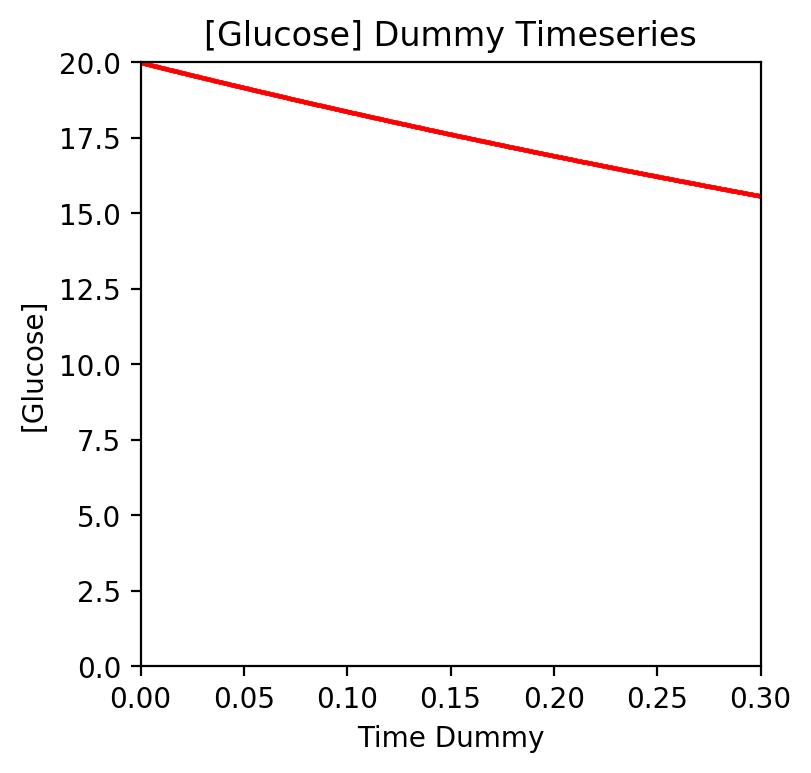

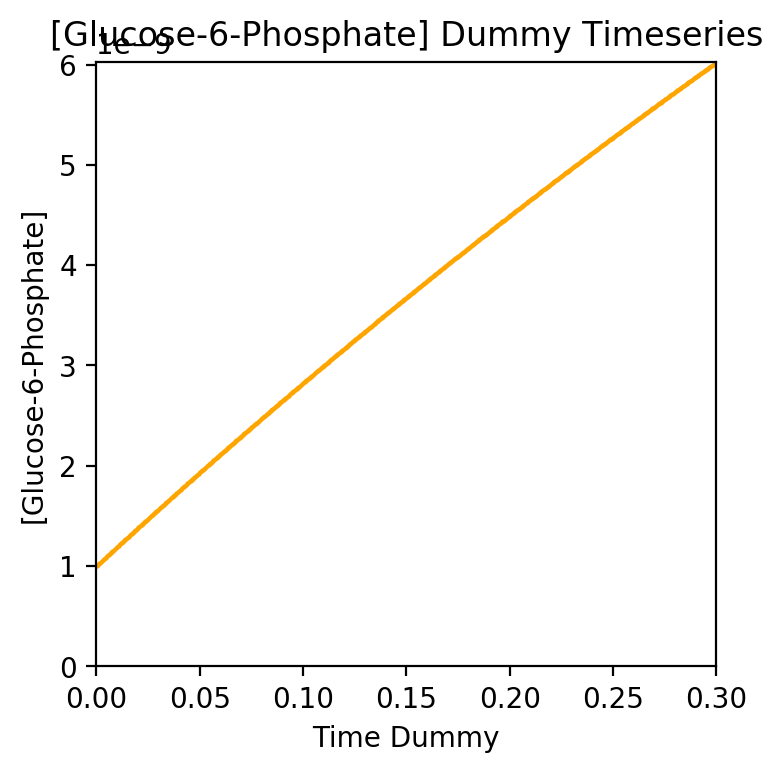

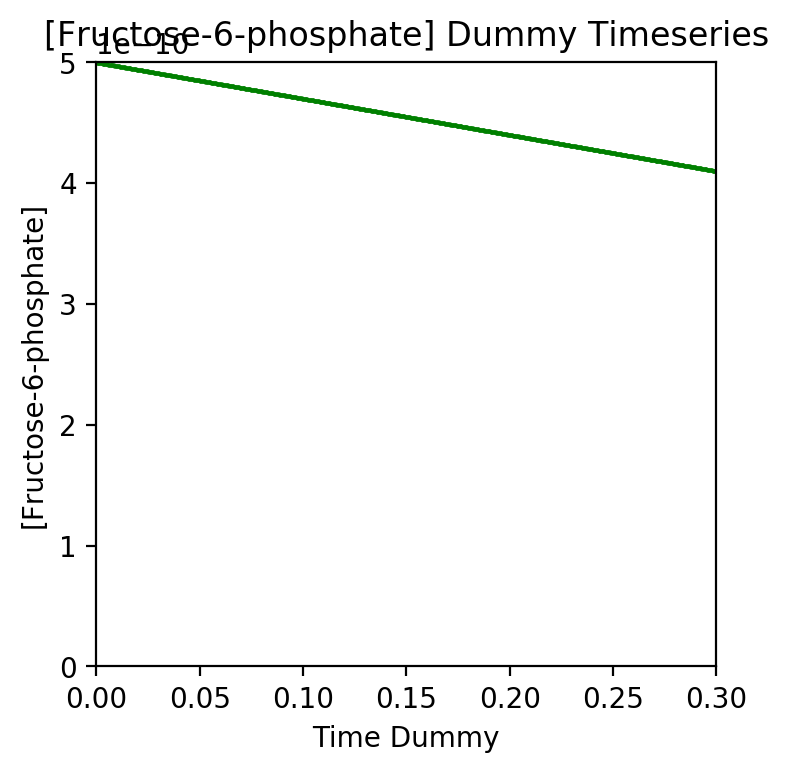

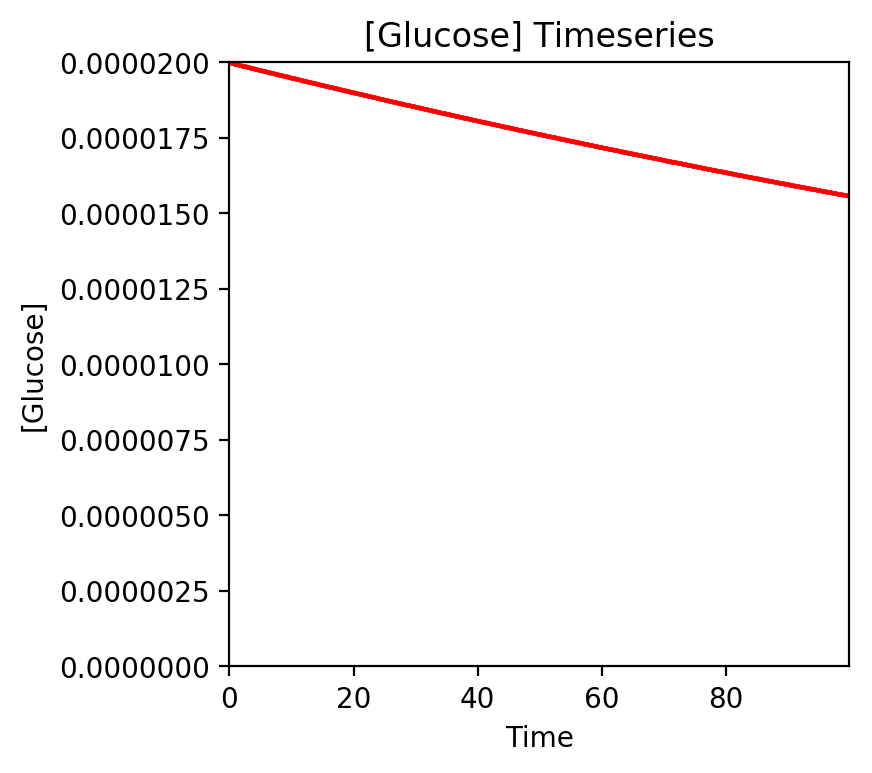

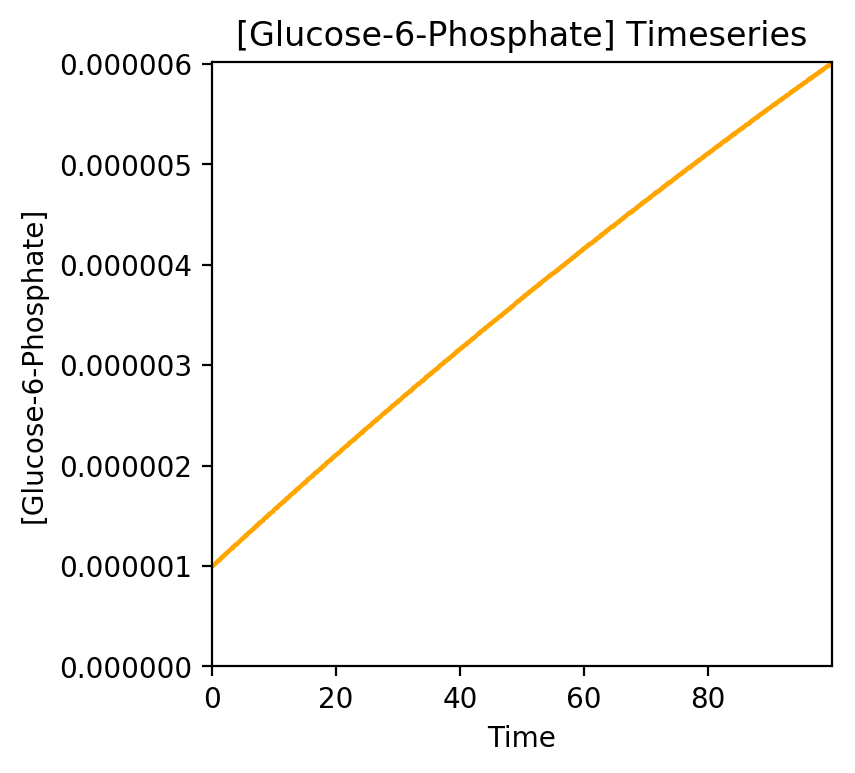

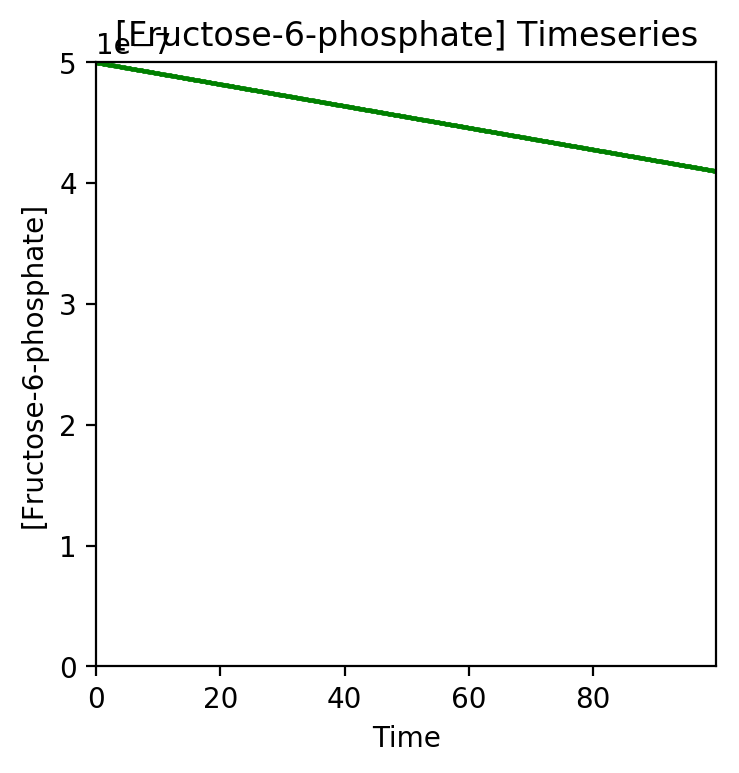

In [6]:
#############################################################################
#
#
#
#
#
#
#

        
def main():

    introduction()
    
    #'''
            #Initialize variables, as the programmer (No input statements)
            #Uncomment this if you're a lazy programmer c: 
            
    inputs(input_list, cof_list,3,5)
    cof_list[0] = 2e-5       #[Glu]
    cof_list[1] = 1e-6       #[G6P]
    cof_list[2] = 5e-7       #[F6P]
    #cof_list[3] = 0.1       #StepSize
    #cof_list[4] = 100000     #Number of Steps
    
    cof_list[5] = 1e-6       #Km Glucose
    cof_list[6] = 3e-3       #Vmax Glucose 
    cof_list[7] = 1e-4       #Km G6P
    cof_list[8] = 5e-7       #Vmax G6P
    cof_list[9] = 1000       #Keq Inhibition of Hexokinase
    
    #'''
    
    '''
    
            #Input the initial dimensional variable values
    inputs(input_list, cof_list,0,5)
    
            #Input the dimensional coefficient values
    inputs(input_list[5:10], cof_list[5:10], 5,10)
    
    '''
    
            #Assign the dimensionless timestep value to the timestep
            #entry of cof_list, as well as the dimensionless coefficients
    cof_list[15]= cof_list[5]     #delta
    cof_list[16] = cof_list[9]    #rho
    cof_list[17] = cof_list[9]    #kappa
    cof_list[18] = 1/cof_list[6]  #tao
    cof_list[3] = cof_list[3]/cof_list[18]
    cof_list[10] = cof_list[27]/(cof_list[5]*cof_list[6])  #sits where gin sits in the d(glu)/dt equation
    cof_list[11] = cof_list[5]/cof_list[9]                 #coefficient that multiplies the G6P import term
    cof_list[12] = cof_list[8]/cof_list[6]                 #coefficient that multiplies the G6P export term
    cof_list[13] = cof_list[7]/cof_list[9]                 #sits where Kp sits in the d(g6p)/dt equation
    cof_list[14] = cof_list[28]/(cof_list[9]*cof_list[6]) 

            #Convert to dimensionless units
    for i in range(3):
        cof_list[i+19].append(convert_forewards(cof_list[i],cof_list[i+15]))
    
            #Perform the timeseries
    dim_timeseries(cof_list[19],cof_list[20],cof_list[21],cof_list[22])
        
        #This is for the conversion back to dimensional values, which I haven't perfected yet        
    for i in range(4):
        dummy_list = cof_list[i+19]
        holder = []
        for q in range(cof_list[4]):
            element = convert_backwards(dummy_list[q],cof_list[i+15], cof_list[i+23])
            holder.append(element)
        cof_list[i+23] = holder
    
            #Make the graphs
    for i in range(3):
        figure_i = plt.figure(dpi=200, figsize = (4,4))
        figure_list.append(figure_i)
        make_graphs(cof_list[22], cof_list[i+19], figure_list[i],
                    graphword_list[0], graphword_list[i+2], graphword_list[i+2],
                    graphword_list[5], color_list[i])  
    for i in range(3):
        figure_i = plt.figure(dpi=200, figsize = (4,4))
        figure_list.append(figure_i)
        make_graphs(cof_list[26],cof_list[i+23],figure_list[i+3],
                    graphword_list[1],graphword_list[i+2],graphword_list[i+2],
                    graphword_list[6],color_list[i])
    plt.show()

main()





<h3> Tests</h3>

This is just a series of tests. If you want to run any of them, just uncomment the test. Also, the majority of them just print the output of something and we just check to make sure that it doesn't crash and that it produces the expected result. Essentially, I took all of my print statement comments from creating the programs, generalized them, and stuck them here. 

In [7]:
## #Tester functions

def test_intro():
    introduction()
    
#test_intro()
    
def test_ssf():
    print("This function test the scino_star_float() function by looking at values that \n\
    pass or fail")
    print("")
    print("The first four tests should produce values equal to the position of the first \n\
    star character in the string because they are all valid inputs\n")
    print("2*10**(-3)")
    print(scino_star_float("2*10**(-3)"))
    print("2*10**-3")
    print(scino_star_float("2*10**-3"))
    print("2*10**3")
    print(scino_star_float("2*10**3"))
    print("2.345*10**-2")
    print(scino_star_float("2.345*10**-2"))
    print("")
    print("")
    print("These ones will fail and print 'Unexpected Error...'")
    print("2*10**10")
    print(scino_star_float("2*10*10"))
    print("2*10")
    print(scino_star_float("2*10"))
    
#test_ssf()

def test_sef():
    print("This function tests the scino_e_float() function by looking at values that \n\
    pass or fail.")
    print("The first four tests should produce values equal to the position of the first \n\
    'e' character in the string because they are all valid inputs\n")
    print("2e(-3)")
    print(scino_e_float("2e(-3)"))
    print("2e-3")
    print(scino_e_float("2e-3"))
    print("2e3")
    print(scino_e_float("2e3"))
    print("2.345e-2")
    print(scino_e_float("2.345e-2"))
    print("")
    print("")
    print("These ones will fail and print 'Unexpected Error...'")
    print("2e")
    print(scino_e_float("2e"))
    print("2e ")
    print(scino_e_float("2e "))
    print("2e-")
    print(scino_e_float("2e-"))
    
#test_sef()

def test_mult():
    print("This function tests the mult_fail() function by evaluating numbers \n\
    that should pass or fail.")
    print("The first four tests should produce values equal to the position of the first \n\
    star character in the string because they are all valid inputs\n")
    print("2*10**(-3)")
    print(mult_fail("2*10**(-3","2*10**(-3)".find("*")))
    print("2*10**-3")
    print(mult_fail("2*10**-3","2*10**-3".find("*")))
    print("2*10**3")
    print(mult_fail("2*10**3","2*10**3".find("*")))
    print("2.345*10**-2")
    print(mult_fail("2.345*10**-2","2.345*10**-2".find("*")))
    print("")
    print("")
    print("These ones will fail and return a value of -2")
    print("2*10**10")
    print(mult_fail("2*10*10","2*10*10".find("*")))
    print("2*10")
    print(mult_fail("2*10", "2*10".find("*")))
    
#test_mult()

def test_expon():
    print("Here we are going to test the expon_fail() function. \n\
    We will do so by printing a series of things that should either\n\
    pass or return a failure message.")
    print("")
    print("The first four tests should produce values equal to the position of the first \n\
    star character in the string because they are all valid inputs\n")
    print("2e(-3)")
    print(expon_fail("2e(-3)","2e(-3)".find("e")))
    print("2e-3")
    print(expon_fail("2e-3", "2e-3".find("e")))
    print("2e3")
    print(expon_fail("2e3", "2e3".find("e")))
    print("2.345e-2")
    print(expon_fail("2.345e-2", "2.345e-2".find("*")))
    print("")
    print("")
    print("These ones will fail and return a value of -2")
    print("2e")
    print(expon_fail("2e", "2e".find("e")))
    print("2e ")
    print(expon_fail("2e ", "2e ".find("*")))
    print("2e-")
    print(expon_fail("2e-", "2e-".find("*")))
    
#test_expon()

def test_convert():
    print("This function tests the convert_forwards() and convert_backwards() functions by \n\
    converting a number forewards and backwards.")
    print("If the original value is 4, and the conversion coefficient is 4, then the converted \n\
    value will be 1. We will test this here.")
    a = None
    original = 4
    converted = 1
    coefficient = 4
    print("First, convert forwards will convert 4 into 1 using 4 as a coefficient:")
    print(convert_forewards(original,coefficient))
    print("")
    print("Then, convert backwards will convert 1 into 4 using 4 as a coefficient:")
    print(convert_backwards(converted,coefficient,a))
    
#test_convert()

def test_ii():
    print("This function test the invalid_input() function by giving it a list of \n\
    silly phrases that will occur when different parts of the while loop fail, which \n\
    will be shown when the while loop loops.")
    inputsss = ["This one time at band camp...",
               "Is this thing on?......",
               "I think I got lost....."]
    cofff = ["2.-", "2e", "2*10"]
    print("")
    
    for i in range(3):
        print("The string '"+cofff[i]+"' Should fail")
        invalid_input(inputsss[i],cofff[i])

#test_ii()

def test_i():
    print("This function tests the inputs() function. ")
    print("")
    inputsss = []
    cofff=[]
    inputs(inputsss,cofff,0,3)
    
#test_i()

def test_dt():
    print("This function tests dim_timeseries().")
    a = [1]
    b = [1]
    c = [1] 
    
    cof_list[3] = 1
    cof_list[4] = 5
    cof_list[5] = 10              #kg
    cof_list[6] = 1.67*10**(-4)   #vg   1.67e-4
    cof_list[7] = 1*10**(-6)      #kp
    cof_list[8] = 1.44*10**(-3)   #vp
    cof_list[9] = 4.13*10**(-5)   #ki
    cof_list[10] = cof_list[27]/(cof_list[5]*cof_list[6])  #sits where gin sits in the d(glu)/dt equation
    cof_list[11] = cof_list[5]/cof_list[9]                 #coefficient that multiplies the G6P import term
    cof_list[12] = cof_list[8]/cof_list[6]                 #coefficient that multiplies the G6P export term
    cof_list[13] = cof_list[7]/cof_list[9]                 #sits where Kp sits in the d(g6p)/dt equation
    cof_list[14] = cof_list[28]/(cof_list[9]*cof_list[6]) 
    cof_list[15]= cof_list[5]     #delta
    cof_list[16] = cof_list[9]    #rho
    cof_list[17] = cof_list[9]    #kappa
    cof_list[18] = 1/cof_list[6]  #tao
    
    cof_list[27] = 6*10**(-9)     #gin
    cof_list[28] = 9*10**(-10)    #fout
    
    dim_timeseries(a,b,c)
    print(a,b,c)
    
#test_dt()

Berg, J. M., Tymoczko, J.L., and Stryer, L. (2002). Biochemsitry, ; w. h.



hfdsjklkja

# 